# Part 3: Overview of Plotting Functions

We've talked a lot about laying things out, etc, but we haven't talked about actually plotting data yet. Matplotlib has a number of different plotting functions -- many more than we'll cover here, in fact. There's a more complete list in the pyplot documentation, and Matplotlib gallery is a great place to get examples of all of them.  

However, a full list and/or the gallery can be a bit overwhelming at first. Instead we'll condense it down and give you a look at some of the ones you're most likely to use, and then go over a subset of those in more detail.

Here's a simplified visual overview of matplotlib's most commonly used plot types.  Let's browse through these, and then we'll go over a few in more detail. Clicking on any of these images will take you to the code that generated them. We'll skip that for now, but feel browse through it later.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [53]:
x = np.arange(0, 1.1, .05)
y = x**2
scale = np.random.rand(len(x))

In [54]:
scale

array([0.09834683, 0.42110763, 0.95788953, 0.53316528, 0.69187711,
       0.31551563, 0.68650093, 0.83462567, 0.01828828, 0.75014431,
       0.98886109, 0.74816565, 0.28044399, 0.78927933, 0.10322601,
       0.44789353, 0.9085955 , 0.29361415, 0.28777534, 0.13002857,
       0.01936696, 0.67883553])

Text(0.5, 1.0, 'axes.fill_between')

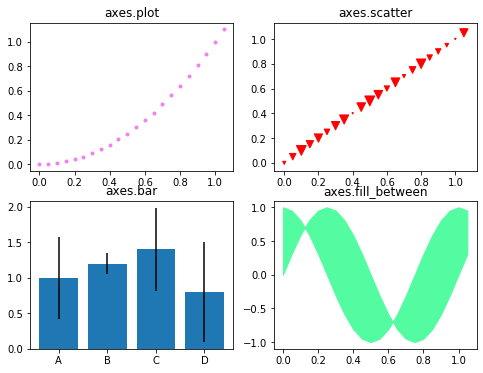

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
ax[0, 0].plot(x, x**2, '.', c='violet')
ax[0, 0].set_title('axes.plot')

ax[0, 1].scatter(x, x, s=scale*100, marker='v', c='red')
ax[0, 1].set_title('axes.scatter')

ax[1, 0].bar(['A', 'B', 'C', 'D'], [1.0, 1.2, 1.4, .8], yerr=np.random.rand(4))
ax[1, 0].set_title('axes.bar')

ax[1, 1].fill_between(x, np.sin(2*np.pi*x), np.cos(2*np.pi*x), color="xkcd:sea green")
ax[1, 1].set_title('axes.fill_between')

# Contour plots

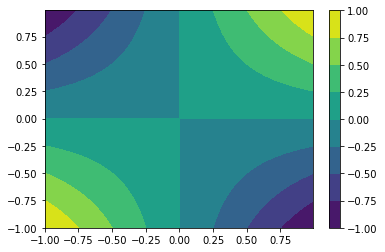

In [77]:
fig, ax = plt.subplots(1, 1)

x = np.arange(-1, 1, .01)
y = np.arange(-1, 1, .01)

# Outer product is the opposite of inner product, giving a matrix.
z = np.outer(x, y)

mapped_data = ax.contourf(x, y, z)
colorbar = fig.colorbar(mapped_data)

<div class="alert alert-block alert-info">
    <b>Exercise 1</b> <p>Try it out: Make a figure with at least two subplots using at least two different kinds of plots.
</div>

In [73]:
import pandas as pd
#df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-22/horror_movies.csv")
df = pd.read_csv("data/horror_movies.csv")
df.columns

Index(['title', 'genres', 'release_date', 'release_country', 'movie_rating',
       'review_rating', 'movie_run_time', 'plot', 'cast', 'language',
       'filming_locations', 'budget'],
      dtype='object')

The following cell wrangles some data into new columns. See Part 2 for further explanations. Feel free to use these columns or create your own!

In [74]:
df['year_released'] = pd.to_datetime(df['release_date']).map(lambda d: d.year)
df['has_witches'] = df['plot'].str.contains('witch')
budget_split_columns = df['budget'].str.extract('([^0-9]*)([0-9.,]*)')
budget_split_columns[budget_split_columns[1].notnull()].head()
df["budget_currency"] = budget_split_columns[0]
df["budget_amount"] = budget_split_columns[1].str.replace(",", "").astype("float")

In [75]:
# Your code here...

Example visualizations shown below.

Text(0, 0.5, 'Number of movies')

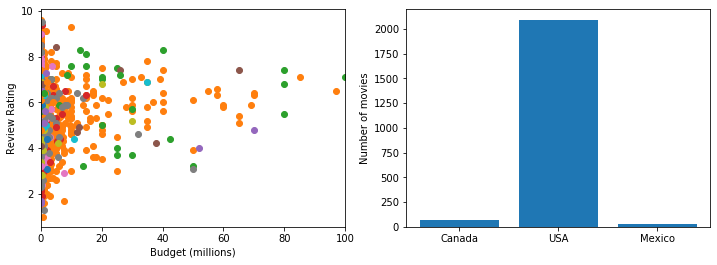

In [122]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot a separate color for each currency.
for currency in df['budget_currency'].unique():
    filtered_df = df[df['budget_currency'] == currency]
    ax[0].scatter(filtered_df["budget_amount"]/10**6, filtered_df["review_rating"], label=currency)

ax[0].set_xlim(0, 100)  # Cut out the larger numbers.
ax[0].set_xlabel("Budget (millions)")
ax[0].set_ylabel("Review Rating")
#ax[0].legend()  # There are *lots* of currencies. Uncomment to see what happens...

# Since there are many countries, let's select just a few.
countries = ["Canada", "USA", "Mexico"]
movie_count_by_country = [df[df["release_country"]==x].shape[0] for x in countries]
ax[1].bar(countries, movie_count_by_country)
ax[1].set_ylabel("Number of movies")